In [10]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# All methods
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity == 0:
        return "neutral"
    else:
        return "negative"

In [2]:
df = pd.read_csv('../data/processed/cleaned_data.csv')
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,cleaned_review
0,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… trip verified | flew on turkish airlines i...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,trip verified | flew on turkish airlines iad-...
1,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… trip verified | basel to cape town via ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,trip verified | basel to cape town via istanb...
2,Turkish Airlines,6.0,Sami Osman,29th April 2019,not verified | abu dhabi to luxembourg via ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,not verified | abu dhabi to luxembourg via ist...
3,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… trip verified | the experience with turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,trip verified | the experience with turkish a...
4,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… trip verified | houston to kiev via istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,trip verified | houston to kiev via istanbul....


<h2>Sentiment analysis</h2>

In [9]:
df['sentiment'] = df['cleaned_review'].apply(get_sentiment)
df[['cleaned_review', 'sentiment']].head()

,cleaned_review,sentiment
0,trip verified | flew on turkish airlines iad-...,positive
1,trip verified | basel to cape town via istanb...,positive
2,not verified | abu dhabi to luxembourg via ist...,positive
3,trip verified | the experience with turkish a...,negative
4,trip verified | houston to kiev via istanbul....,positive


/var/folders/69/cxvk42w94ngf56592w6b56fc0000gn/T/ipykernel_4549/1491379991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette=['red', 'gray', 'green'])


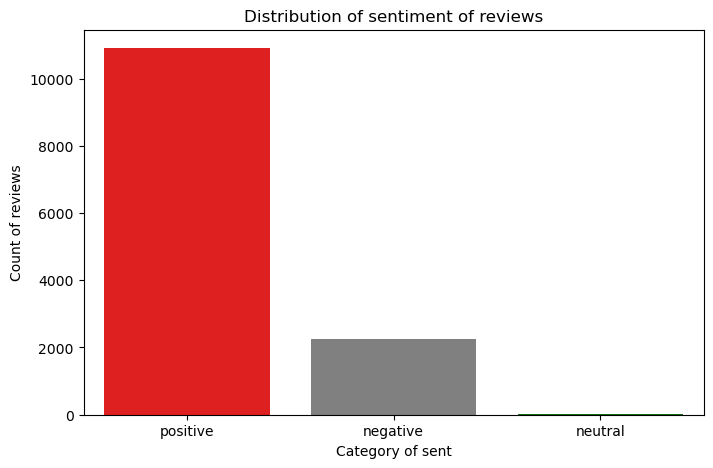

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['sentiment'], palette=['red', 'gray', 'green'])
plt.xlabel("Category of sent")
plt.ylabel("Count of reviews")
plt.title("Distribution of sentiment of reviews")
plt.show()

In [19]:
df.to_csv('../data/processed/cleaned_data.csv', index=False)